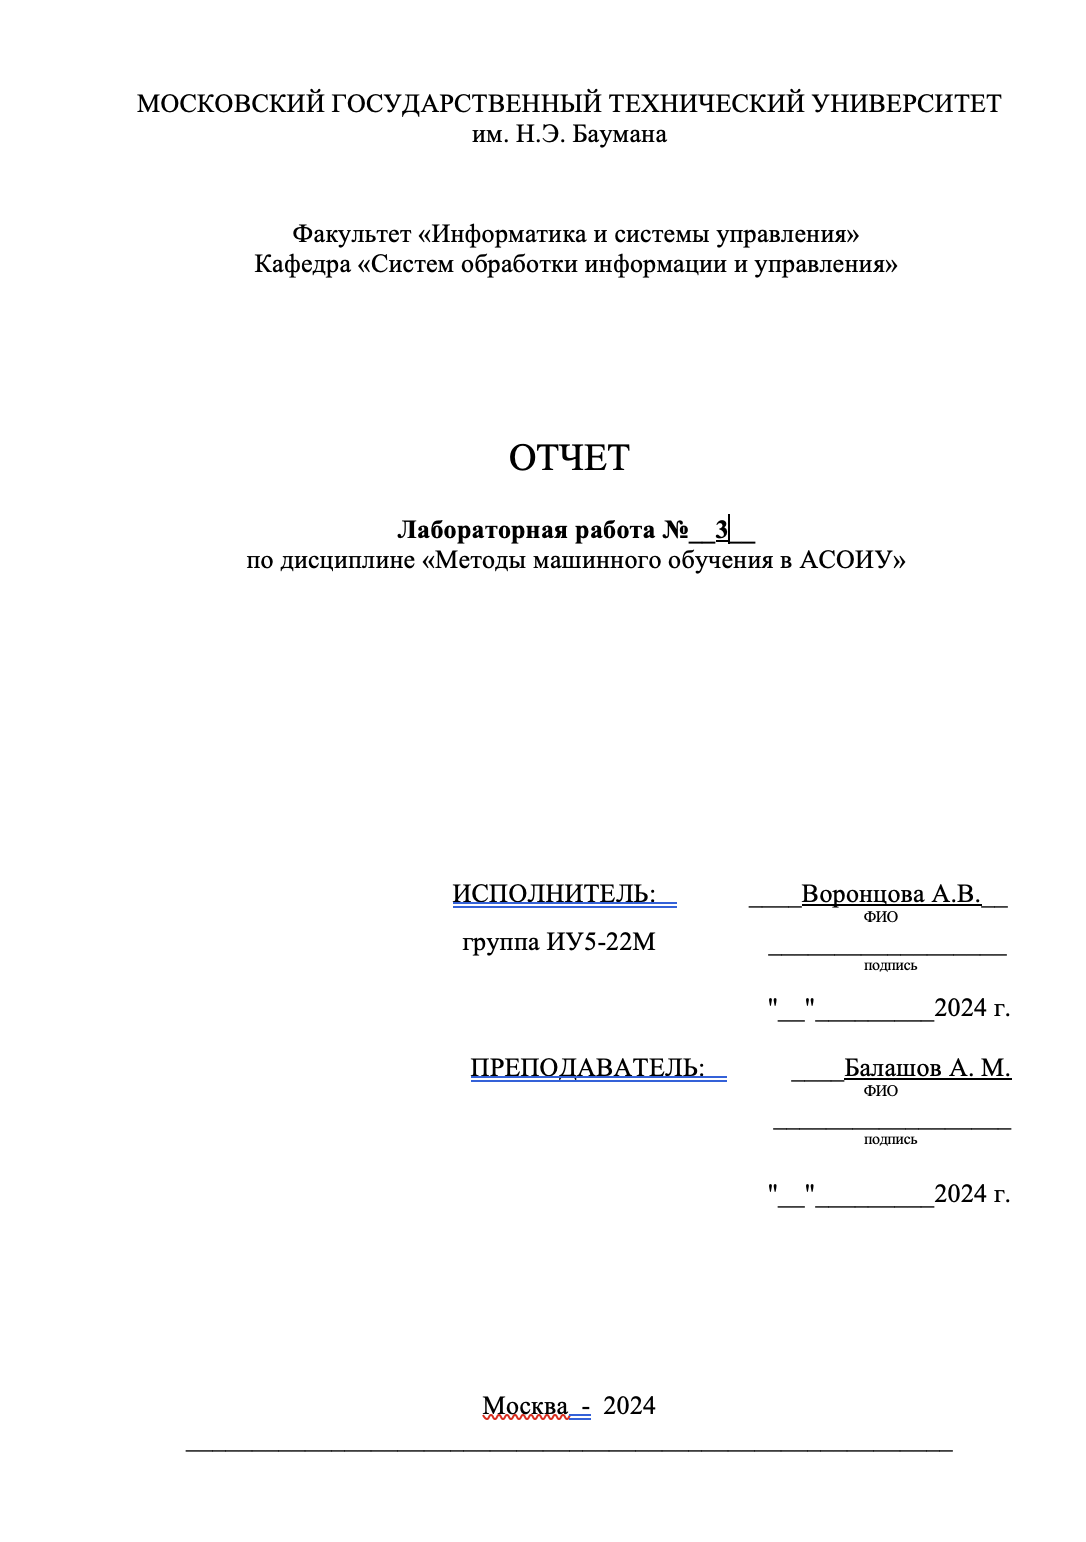

Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.
Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
масштабирование признаков (не менее чем тремя способами);
обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
отбор признаков:
один метод из группы методов фильтрации (filter methods);
один метод из группы методов обертывания (wrapper methods);
один метод из группы методов вложений (embedded methods).

In [6]:
# Импорт необходимых библиотек и загрузка данных
from sklearn.datasets import load_wine
import pandas as pd

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Масштабирование признаков
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler_standard = StandardScaler()
df_scaled_standard = scaler_standard.fit_transform(df.drop('target', axis=1))

scaler_minmax = MinMaxScaler()
df_scaled_minmax = scaler_minmax.fit_transform(df.drop('target', axis=1))

scaler_robust = RobustScaler()
df_scaled_robust = scaler_robust.fit_transform(df.drop('target', axis=1))

print("Standard Scaling:")
print(df_scaled_standard)

print("\nMinMax Scaling:")
print(df_scaled_minmax)

print("\nRobust Scaling:")
print(df_scaled_robust)

# Обработка выбросов для числовых признаков
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)).any(axis=1))]

print("\nData without outliers:")
print(df_no_outliers)



Standard Scaling:
[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]

MinMax Scaling:
[[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.66403162 0.73796791 ... 0.10569106 0.12087912 0.20114123]]

Robust Scaling:
[[ 0.8973384 

In [7]:
# Обработка нестандартного признака
# Для примера возьмем текстовый признак "description" и преобразуем его с помощью TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
text_data = ["good wine", "bad wine", "excellent taste"]
text_features = tfidf.fit_transform(text_data)

print("\nTF-IDF transformed text features:")
print(text_features.toarray())



TF-IDF transformed text features:
[[0.         0.         0.79596054 0.         0.60534851]
 [0.79596054 0.         0.         0.         0.60534851]
 [0.         0.70710678 0.         0.70710678 0.        ]]


In [8]:
# Отбор признаков
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Фильтрация (filter method)
selector_filter = SelectKBest(score_func=f_classif, k=5)
X_filtered = selector_filter.fit_transform(df.drop('target', axis=1), df['target'])

print("\nFeatures selected using Filter method:")
print(X_filtered)

# Обертывание (wrapper method)
estimator = LogisticRegression(solver='liblinear')
selector_wrapper = RFE(estimator, n_features_to_select=5, step=1)
X_wrapper = selector_wrapper.fit_transform(df.drop('target', axis=1), df['target'])

print("\nFeatures selected using Wrapper method:")
print(X_wrapper)

# Вложения (embedded method)
selector_embedded = SelectFromModel(RandomForestClassifier(n_estimators=100))
X_embedded = selector_embedded.fit_transform(df.drop('target', axis=1), df['target'])

print("\nFeatures selected using Embedded method:")
print(X_embedded)


Features selected using Filter method:
[[1.423000e+01 3.060000e+00 5.640000e+00 3.920000e+00 1.065000e+03]
 [1.320000e+01 2.760000e+00 4.380000e+00 3.400000e+00 1.050000e+03]
 [1.316000e+01 3.240000e+00 5.680000e+00 3.170000e+00 1.185000e+03]
 [1.437000e+01 3.490000e+00 7.800000e+00 3.450000e+00 1.480000e+03]
 [1.324000e+01 2.690000e+00 4.320000e+00 2.930000e+00 7.350000e+02]
 [1.420000e+01 3.390000e+00 6.750000e+00 2.850000e+00 1.450000e+03]
 [1.439000e+01 2.520000e+00 5.250000e+00 3.580000e+00 1.290000e+03]
 [1.406000e+01 2.510000e+00 5.050000e+00 3.580000e+00 1.295000e+03]
 [1.483000e+01 2.980000e+00 5.200000e+00 2.850000e+00 1.045000e+03]
 [1.386000e+01 3.150000e+00 7.220000e+00 3.550000e+00 1.045000e+03]
 [1.410000e+01 3.320000e+00 5.750000e+00 3.170000e+00 1.510000e+03]
 [1.412000e+01 2.430000e+00 5.000000e+00 2.820000e+00 1.280000e+03]
 [1.375000e+01 2.760000e+00 5.600000e+00 2.900000e+00 1.320000e+03]
 [1.475000e+01 3.690000e+00 5.400000e+00 2.730000e+00 1.150000e+03]
 [1.4380